In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline  
from matplotlib.pyplot import figure
#figure(figsize=(8, 6), dpi=80)

In [2]:
df = pd.read_csv("positivos_covid.csv", sep =";")

In [3]:
df.head(4)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,20220111,LIMA,LIMA,SAN MARTIN DE PORRES,PR,25.0,MASCULINO,20201217.0,150135.0,24662153.0
1,20220111,ICA,PISCO,PISCO,PR,20.0,FEMENINO,20200822.0,110501.0,24662175.0
2,20220111,HUANUCO,HUANUCO,HUANUCO,PR,22.0,FEMENINO,20200729.0,100101.0,24662197.0
3,20220111,ANCASH,SANTA,SANTA,AG,18.0,FEMENINO,20210630.0,21808.0,24662204.0


In [4]:
df.columns

Index(['FECHA_CORTE', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'METODODX',
       'EDAD', 'SEXO', 'FECHA_RESULTADO', 'UBIGEO', 'id_persona'],
      dtype='object')

In [5]:
df["FECHA_CORTE"] =pd.to_datetime(df["FECHA_CORTE"], format = "%Y%m%d")
df["FECHA_RESULTADO"] = pd.to_datetime(df["FECHA_RESULTADO"], format = "%Y%m%d")

In [6]:
df.head(4)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,2022-01-11,LIMA,LIMA,SAN MARTIN DE PORRES,PR,25.0,MASCULINO,2020-12-17,150135.0,24662153.0
1,2022-01-11,ICA,PISCO,PISCO,PR,20.0,FEMENINO,2020-08-22,110501.0,24662175.0
2,2022-01-11,HUANUCO,HUANUCO,HUANUCO,PR,22.0,FEMENINO,2020-07-29,100101.0,24662197.0
3,2022-01-11,ANCASH,SANTA,SANTA,AG,18.0,FEMENINO,2021-06-30,21808.0,24662204.0


In [7]:
df.EDAD = df.EDAD.fillna(0)
df["EDAD"] = df["EDAD"].astype(int)

In [52]:
df.EDAD

0          25
1          20
2          22
3          18
4          17
           ..
2440344    63
2440345    18
2440346    43
2440347     0
2440348    36
Name: EDAD, Length: 2440349, dtype: int64

In [9]:
df.id_persona = df.id_persona.fillna(0)
df.id_persona = df.id_persona.astype(int)

In [55]:
df["FECHA_RESULTADO"].max()

Timestamp('2022-01-11 00:00:00')

In [10]:
df.id_persona

0          24662153
1          24662175
2          24662197
3          24662204
4          24662207
             ...   
2440344           0
2440345           0
2440346           0
2440347           0
2440348           0
Name: id_persona, Length: 2440349, dtype: int64

In [12]:
df["DEPARTAMENTO"].value_counts(normalize=True)

LIMA             0.448800
AREQUIPA         0.051221
CALLAO           0.045359
PIURA            0.041082
LA LIBERTAD      0.040433
JUNIN            0.038208
ANCASH           0.035245
CUSCO            0.034386
CAJAMARCA        0.028976
LAMBAYEQUE       0.028612
ICA              0.026735
SAN MARTIN       0.020654
LORETO           0.018774
PUNO             0.018008
HUANUCO          0.015644
AYACUCHO         0.014838
AMAZONAS         0.013822
TACNA            0.013758
UCAYALI          0.013379
MOQUEGUA         0.012903
APURIMAC         0.011218
TUMBES           0.008129
HUANCAVELICA     0.006977
PASCO            0.006961
MADRE DE DIOS    0.005877
Name: DEPARTAMENTO, dtype: float64

In [13]:
df["DEPARTAMENTO"].value_counts()

LIMA             1095228
AREQUIPA          124997
CALLAO            110693
PIURA             100254
LA LIBERTAD        98671
JUNIN              93242
ANCASH             86010
CUSCO              83915
CAJAMARCA          70711
LAMBAYEQUE         69824
ICA                65243
SAN MARTIN         50403
LORETO             45814
PUNO               43947
HUANUCO            38176
AYACUCHO           36211
AMAZONAS           33730
TACNA              33575
UCAYALI            32649
MOQUEGUA           31488
APURIMAC           27375
TUMBES             19837
HUANCAVELICA       17026
PASCO              16987
MADRE DE DIOS      14343
Name: DEPARTAMENTO, dtype: int64

In [14]:
df.groupby(['DEPARTAMENTO',"SEXO"]).size()

DEPARTAMENTO   SEXO     
AMAZONAS       FEMENINO      17766
               MASCULINO     15964
ANCASH         FEMENINO      43981
               MASCULINO     42029
APURIMAC       FEMENINO      13929
               MASCULINO     13446
AREQUIPA       FEMENINO      60035
               MASCULINO     64962
AYACUCHO       FEMENINO      18644
               MASCULINO     17567
CAJAMARCA      FEMENINO      35905
               MASCULINO     34806
CALLAO         FEMENINO      53832
               MASCULINO     56861
CUSCO          FEMENINO      42288
               MASCULINO     41627
HUANCAVELICA   FEMENINO       8705
               MASCULINO      8321
HUANUCO        FEMENINO      20049
               MASCULINO     18127
ICA            FEMENINO      33054
               MASCULINO     32189
JUNIN          FEMENINO      48205
               MASCULINO     45037
LA LIBERTAD    FEMENINO      48937
               MASCULINO     49734
LAMBAYEQUE     FEMENINO      35738
               MASCULINO     3

<AxesSubplot:xlabel='DEPARTAMENTO'>

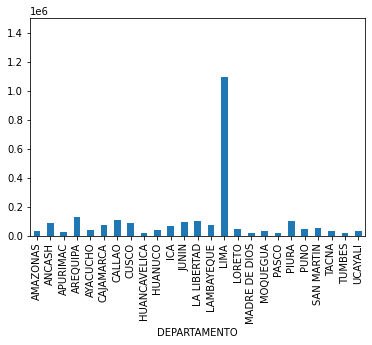

In [46]:
df.groupby(['DEPARTAMENTO']).size().plot(kind = "bar", ylim=(0,1500000))

In [15]:
df["SEXO"].value_counts()

MASCULINO    1240376
FEMENINO     1199972
Name: SEXO, dtype: int64

In [48]:
df.groupby(["SEXO", "EDAD"]).size()

SEXO       EDAD
FEMENINO   -79        1
            0      3901
            1      2787
            2      2251
            3      2100
                   ... 
MASCULINO   119       2
            120      11
            121       4
            122       1
            125       1
Length: 236, dtype: int64

In [17]:
means = df['id_persona'].groupby([df['SEXO']]).count().astype("float")
means

SEXO
FEMENINO     1199972.0
MASCULINO    1240376.0
Name: id_persona, dtype: float64

<AxesSubplot:>

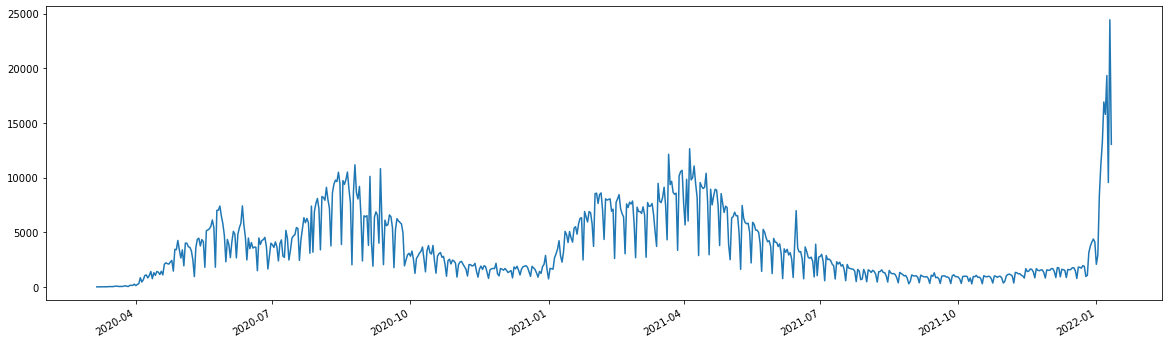

In [19]:
df["FECHA_RESULTADO"].value_counts().plot(kind = "line", figsize = (20,6)) 